In [1]:
# write analog input onto DSC110 toptica scan
import sys
sys.path.append("..")
import nidaqmx
import numpy as np
import time
from LowLevelModules.Confocal import *
from LowLevelModules.GeneralFunctions import *
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
from pymeasure.instruments.thorlabs import ThorlabsPM100USB
from scipy.optimize import curve_fit

from datetime import datetime

from LowLevelModules.NIdaq import *
import pandas as pd

In [2]:
import importlib

In [3]:
# intialize power meter and wavemeter
PM100Addr = 'USB0::0x1313::0x8078::P0021814::INSTR'
PM = ThorlabsPM100USB(PM100Addr)
bristol = Bristol()

In [4]:
print(f'Thorlabs power (uW) = {PM.measure_power(737)*1e6:.0f}')
currentLambda,currentPower = bristol.readBristol()
print(f'Wavelength (nm-air) = {currentLambda: .4f}')
print(f'Bristol power (mW) = {currentPower: .3f}')

Thorlabs power (uW) = 428
Wavelength (nm-air) =  736.9609
Bristol power (mW) =  1.752


<font size="10">Monitor wavelength</font>

<IPython.core.display.Javascript object>


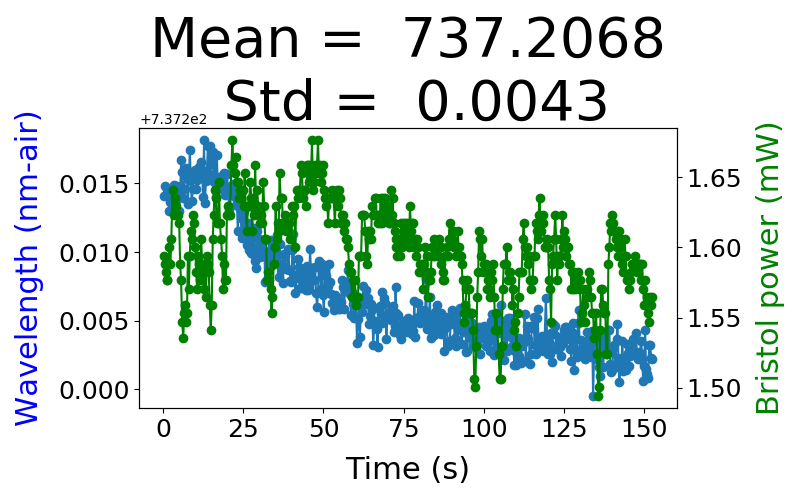

In [7]:
%matplotlib notebook
a,b,c=monitor_wavelength(bristol)

<font size="6">Scan laser piezo voltage</font>

<IPython.core.display.Javascript object>


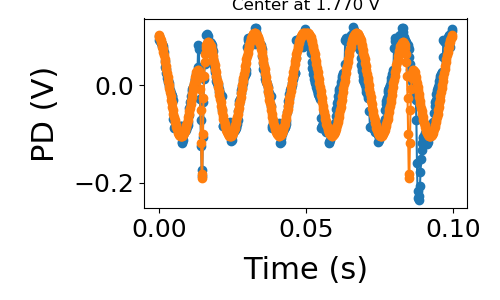

<IPython.core.display.Javascript object>


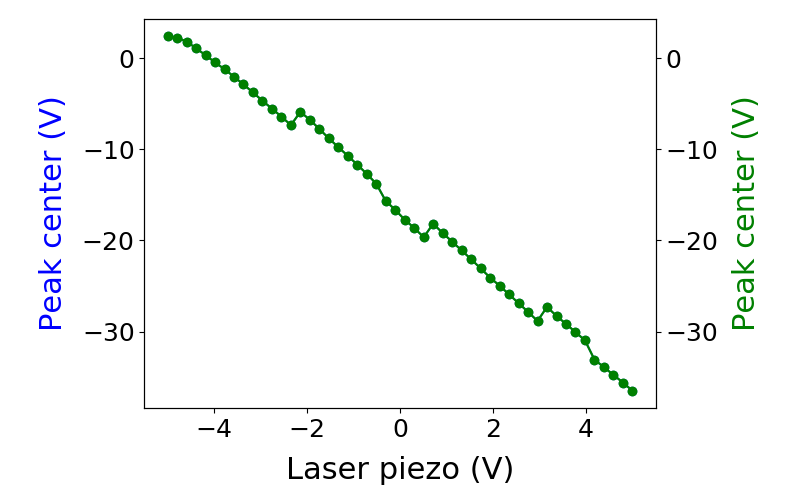

<IPython.core.display.Javascript object>


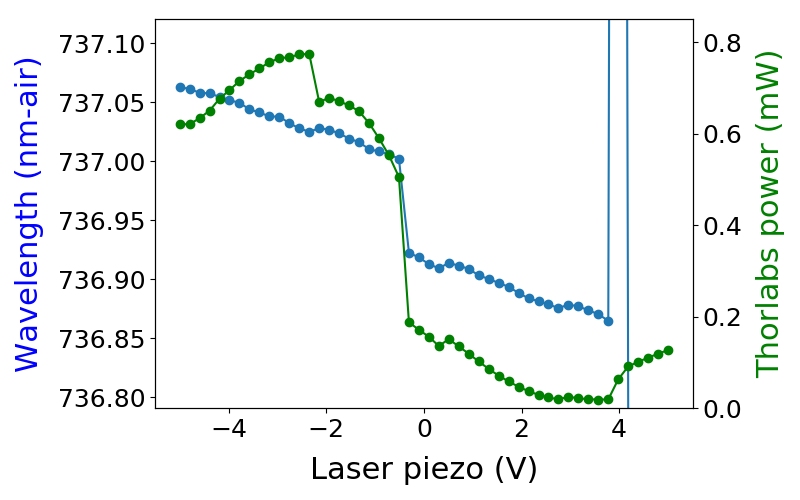

C:\data\200210\TopticaScan\TopticaScan_072237.txt


In [8]:
%matplotlib notebook
scan_laser_piezo(bristol,PM,-5,5,50,True,True,56,65)

# Check scans

In [3]:
directory = r'C:\data\200210\TopticaScan'
# filename = 'TopticaScan_190410.txt'

usersDf1 = pd.read_csv(directory+'\\' + 'TopticaScan_071904' + '.txt', skiprows=5,delimiter =' ',header=None).values
usersDf2 = pd.read_csv(directory+'\\' + 'TopticaScan_072018' + '.txt', skiprows=5,delimiter =' ',header=None).values
usersDf3 = pd.read_csv(directory+'\\' + 'TopticaScan_072124' + '.txt', skiprows=5,delimiter =' ',header=None).values
usersDf4 = pd.read_csv(directory+'\\' + 'TopticaScan_072237' + '.txt', skiprows=5,delimiter =' ',header=None).values

(736.7, 737.15)

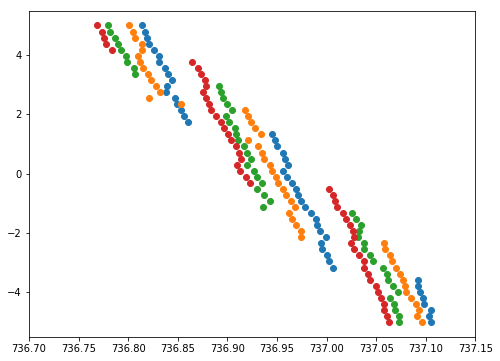

In [4]:
fig=plt.figure(figsize=(8,6))

# plt.plot(usersDf1[:,0],usersDf1[:,1],marker='o',linestyle="None")
# plt.plot(usersDf2[:,0],usersDf2[:,1],marker='o',linestyle="None")
# plt.plot(usersDf3[:,0],usersDf3[:,1],marker='o',linestyle="None")
# plt.plot(usersDf4[:,0],usersDf4[:,1],marker='o',linestyle="None")

plt.plot(usersDf1[:,1],usersDf1[:,0],marker='o',linestyle="None")
plt.plot(usersDf2[:,1],usersDf2[:,0],marker='o',linestyle="None")
plt.plot(usersDf3[:,1],usersDf3[:,0],marker='o',linestyle="None")
plt.plot(usersDf4[:,1],usersDf4[:,0],marker='o',linestyle="None")
# plt.plot(usersDf5[:,1],usersDf5[:,0],marker='o',linestyle="None")
# plt.plot(usersDf6[:,1],usersDf6[:,0],marker='o',linestyle="None")
# plt.plot(usersDf7[:,1],usersDf7[:,0],marker='o',linestyle="None")
# plt.plot(usersDf8[:,1],usersDf8[:,0],marker='o',linestyle="None")
plt.xlim(736.7,737.15)

# Fit wavelength to a piecewise linear function

In [102]:
import LowLevelModules
importlib.reload(LowLevelModules.Confocal)
from LowLevelModules.Confocal import *

<IPython.core.display.Javascript object>


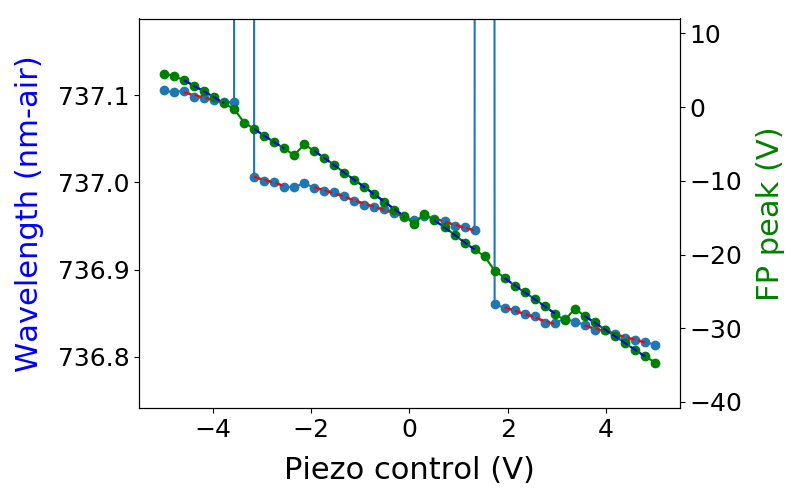

 737.1066, 737.0881, 0.0185,-4.796,-3.571,-0.0151,737.034
 737.0100, 736.9925, 0.0175,-3.367,-2.347,-0.0171,736.952
 736.9984, 736.9571, 0.0414,-2.143, 0.102,-0.0184,736.959
 736.9618, 736.9414, 0.0205, 0.306, 1.531,-0.0167,736.967
 736.8606, 736.8336, 0.0270, 1.735, 3.163,-0.0189,736.893
 736.8391, 736.8132, 0.0259, 3.367, 5.000,-0.0159,736.893


In [103]:
%matplotlib notebook
directory = r'C:\data\200210\TopticaScan'
fileprefix = 'TopticaScan_071904'

lpLR1,mode_hop_free=fit_wavelength_segments(directory,fileprefix)

In [104]:
mode_hop_free

array([[ 7.37106597e+02,  7.37088116e+02,  1.84803526e-02,
        -4.79591837e+00, -3.57142857e+00, -1.50922880e-02,
         7.37034215e+02],
       [ 7.37009963e+02,  7.36992493e+02,  1.74705354e-02,
        -3.36734694e+00, -2.34693878e+00, -1.71211247e-02,
         7.36952310e+02],
       [ 7.36998446e+02,  7.36957067e+02,  4.13787186e-02,
        -2.14285714e+00,  1.02040816e-01, -1.84323383e-02,
         7.36958948e+02],
       [ 7.36961847e+02,  7.36941360e+02,  2.04869375e-02,
         3.06122449e-01,  1.53061224e+00, -1.67309990e-02,
         7.36966968e+02],
       [ 7.36860584e+02,  7.36833609e+02,  2.69757987e-02,
         1.73469388e+00,  3.16326531e+00, -1.88830591e-02,
         7.36893341e+02],
       [ 7.36839136e+02,  7.36813216e+02,  2.59198246e-02,
         3.36734694e+00,  5.00000000e+00, -1.58758926e-02,
         7.36892596e+02]])

In [ ]:
# output mode hop free tuning range
# 1) separate
# 2) on the same line

In [2]:
mode_hop_free

NameError: name 'mode_hop_free' is not defined

In [50]:
lpLR1.ax1.set_ylim(736.7,737.2)

(736.7, 737.2)

In [37]:
x=np.linspace(1,2,3)
y=np.linspace(4,5,3)
z=np.linspace(6,7,3)

<IPython.core.display.Javascript object>


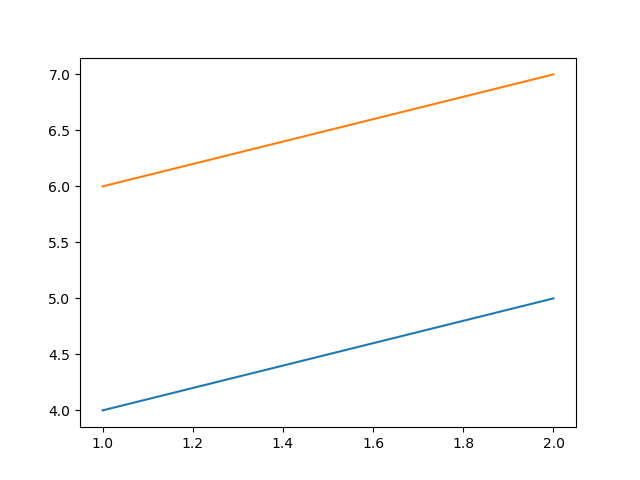

In [33]:
fig = plt.figure()

In [34]:
ax1 = fig.add_subplot(111)

In [35]:
ax1.plot(x,y)

In [39]:
ax1.plot(x,d)

NameError: name 'd' is not defined

<IPython.core.display.Javascript object>


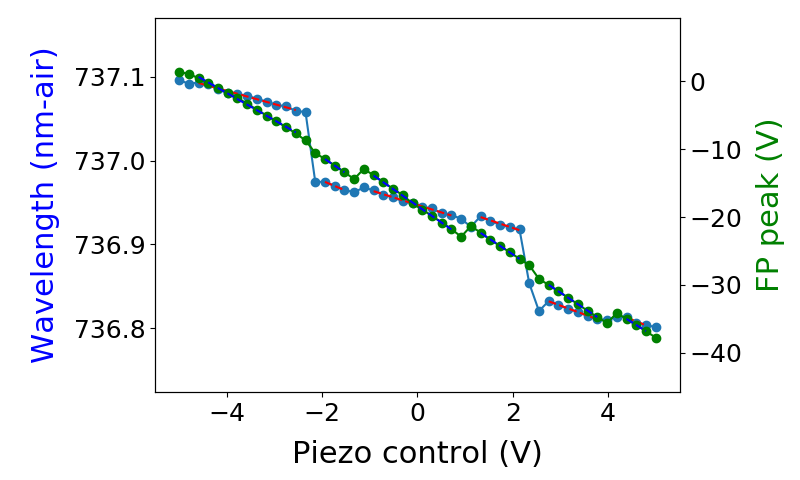

[-1  0 13 18 29 36 44 49]
 737.0924, 737.0601, 0.0323,-4.592,-2.551,-0.0158,737.020
 736.9745, 736.9648, 0.0097,-1.939,-1.531,-0.0239,736.928
 736.9635, 736.9345, 0.0290,-0.918, 0.714,-0.0178,736.947
 736.9327, 736.9170, 0.0156, 1.327, 2.143,-0.0192,736.958
 736.8323, 736.8110, 0.0213, 2.755, 3.776,-0.0209,736.890
 736.8130, 736.8037, 0.0093, 4.388, 4.796,-0.0228,736.913


In [56]:
%matplotlib notebook
directory = r'C:\data\200210\TopticaScan'
fileprefix = 'TopticaScan_072018'

fit_wavelength_segments(directory,fileprefix)

<IPython.core.display.Javascript object>


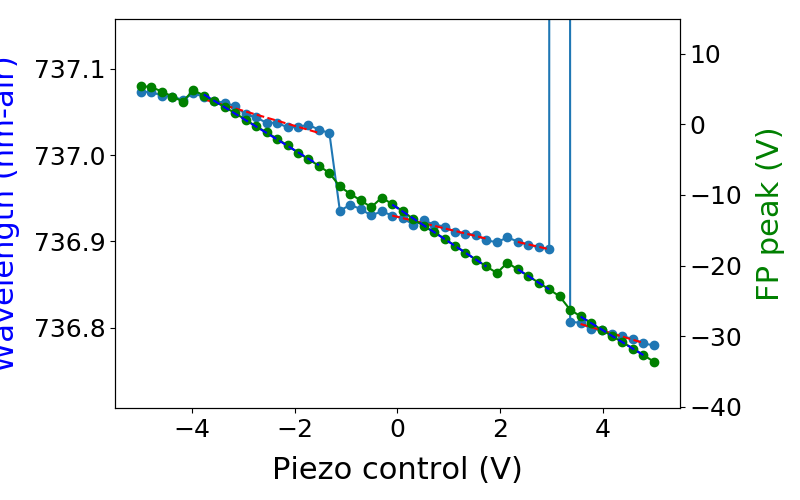

[-1  0  4 18 22 34 40 49]
 737.0647, 737.0257, 0.0390,-3.776,-1.531,-0.0174,736.999
 736.9300, 736.9033, 0.0267,-0.102, 1.735,-0.0145,736.929
 736.8994, 736.8909, 0.0085, 2.347, 2.959,-0.0138,736.932
 736.8044, 736.7824, 0.0219, 3.571, 4.796,-0.0179,736.868


In [57]:
%matplotlib notebook
directory = r'C:\data\200210\TopticaScan'
fileprefix = 'TopticaScan_072124'

fit_wavelength_segments(directory,fileprefix)

<IPython.core.display.Javascript object>


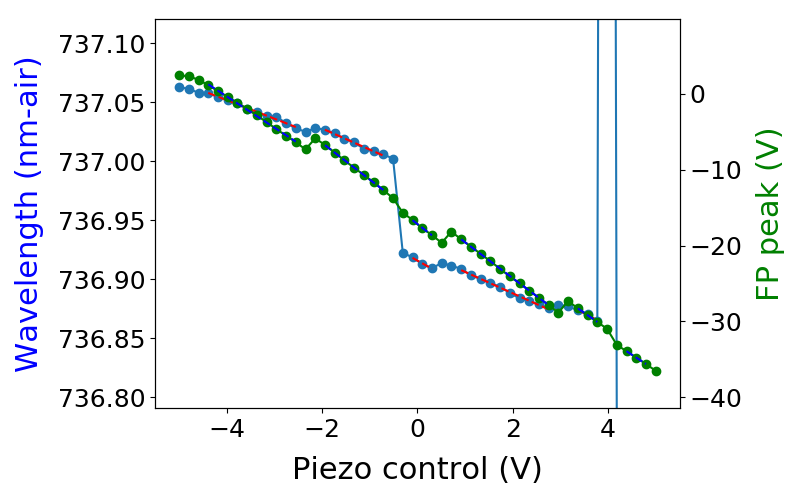

[-1  0  1 13 22 27 39 44 49]
 737.0581, 737.0291, 0.0289,-4.388,-2.551,-0.0158,736.989
 737.0268, 737.0049, 0.0219,-1.939,-0.714,-0.0179,736.992
 736.9182, 736.9090, 0.0092,-0.102, 0.306,-0.0226,736.916
 736.9078, 736.8744, 0.0333, 0.918, 2.755,-0.0182,736.924
 736.8741, 736.8652, 0.0089, 3.367, 3.776,-0.0219,736.948
 736.7778, 736.7735, 0.0043, 4.388, 4.796,-0.0105,736.824


In [61]:
%matplotlib notebook
directory = r'C:\data\200210\TopticaScan'
fileprefix = 'TopticaScan_072237'

fit_wavelength_segments(directory,fileprefix)